In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data = pd.read_csv('lending_club_loan_clean.csv')

In [3]:
data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,...,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,1999,13.0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
data = data.drop('loan_status',axis = 1)

X = data.drop('loan_repaid', axis = 1).values
y = data['loan_repaid'].values

## Logistic Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

#scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train
logmodel = LogisticRegression(max_iter = 500)
logmodel.fit(X_train,y_train)

#predict
predictions_logmodel = logmodel.predict(X_test)

print(classification_report(y_test, predictions_logmodel))
print(confusion_matrix(y_test, predictions_logmodel))

              precision    recall  f1-score   support

           0       0.96      0.45      0.62     23047
           1       0.88      1.00      0.94     95519

    accuracy                           0.89    118566
   macro avg       0.92      0.72      0.78    118566
weighted avg       0.90      0.89      0.87    118566

[[10427 12620]
 [  379 95140]]


## Random forest

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

#train
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)

#predict
predictions_rfc = rfc.predict(X_test)

print(classification_report(y_test, predictions_rfc))
print(confusion_matrix(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     23047
           1       0.88      1.00      0.94     95519

    accuracy                           0.89    118566
   macro avg       0.93      0.72      0.78    118566
weighted avg       0.90      0.89      0.87    118566

[[10367 12680]
 [  317 95202]]


## Neural Network

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

#scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#add hidden layers
model = Sequential()
model.add(Dense(84, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(42, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(42, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(21, activation = 'relu'))
model.add(Dropout(0.2))

#add ouput layer
model.add(Dense(1, activation = 'sigmoid'))

#compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

#train
model.fit(x = X_train, y = y_train, epochs = 25, batch_size = 256, validation_data = (X_test,y_test), verbose = 0)

<AxesSubplot:>

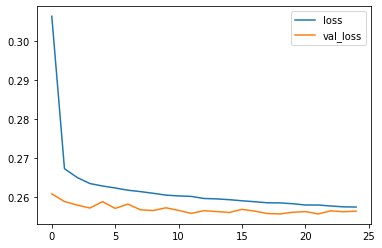

In [10]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [11]:
#predict
predictions = model.predict(X_test)
predictions_nn = np.where(predictions > 0.5, 1, 0)

print(classification_report(y_test, predictions_nn))
print(confusion_matrix(y_test, predictions_nn))

3706/3706 [==============================] - 3s 872us/step
              precision    recall  f1-score   support

           0       0.98      0.44      0.61     23047
           1       0.88      1.00      0.94     95519

    accuracy                           0.89    118566
   macro avg       0.93      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566

[[10162 12885]
 [  155 95364]]
